In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv("input/train.csv")

In [3]:
df_test=pd.read_csv("input/test.csv")

In [4]:
df_train[df_train['Survived']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [166]:
len(df_train['Name'].unique())

891

In [87]:
#Vocab
def make_vocab(src,convert_word,stopwords):
    vocab =  set([])
    stopwords = list(map(convert_word,stopwords))
    for doc in src:
        lines = doc.split("\n")
        for line in lines:
            line = convert_word(line)
            words = line.split(" ")
            for word in words:
                if not(word in stopwords): 
                    vocab.add(word)
    return np.array(list(vocab))

In [88]:
import re
def only_lower(word):
    return re.sub(r'[^a-zA-Z]', " ", word)

In [89]:
vocab=make_vocab(df_train['Name'],only_lower,[""])

In [90]:
len(vocab)

1530

In [93]:
#Bag of Words
#Stop wordsをつぶす
def data2bow(data,vocab,convert_word,stopwords):
    bows = np.ndarray((len(data),len(vocab)))
    stopwords = list(map(convert_word,stopwords))
    for (i,doc) in enumerate(data):
        lines = doc.split("\n")
        bow = bows[i,:]
        for line in lines:
            line = convert_word(line)
            words = line.split(" ")
            for word in words:
                word;
                if word in vocab:
                    if not(word in stopwords): 
                        bow[list(vocab).index(word)]+=1
        #print(i)
    return bows

In [94]:
bow_train=data2bow(df_train['Name'],vocab,only_lower,[""])

In [95]:
bow_test=data2bow(df_test['Name'],vocab,only_lower,[""])

In [96]:
bow_train[:,np.where(sum(bow_train)>4)[0]].shape

(891, 86)

In [97]:
bow_test[:,np.where(sum(bow_train)>4)[0]].shape

(418, 86)

In [100]:
vocab[np.where(sum(bow_train)>4)[0]]

array(['O', 'Alice', 'Master', 'Carter', 'Samuel', 'Marie', 'J', 'Alfred',
       'William', 'Albert', 'August', 'Robert', 'Thomas', 'Johan',
       'Arthur', 'Florence', 'Patrick', 'Margaret', 'Gustafsson', 'Miss',
       'Rice', 'Maria', 'Richard', 'Henry', 'James', 'Annie', 'Johnson',
       'Ernest', 'Francis', 'Harris', 'Andersson', 'Goodwin', 'Karl',
       'Catherine', 'Louise', 'Brown', 'E', 'L', 'Harry', 'David', 'Ellen',
       'Edith', 'Peter', 'Jr', 'Anne', 'Mary', 'Sofia', 'Bertha', 'Walter',
       'Frank', 'Mr', 'de', 'Frederick', 'Elias', 'Gustaf', 'Ada', 'Ford',
       'Martin', 'Joseph', 'Daniel', 'Williams', 'Mrs', 'John', 'Panula',
       'H', 'Olsen', 'Charles', 'Kate', 'Nils', 'Helen', 'Hansen', 'Anna',
       'y', 'Edward', 'Alexander', 'Jane', 'Rev', 'Leonard', 'Victor',
       'Ernst', 'George', 'Elizabeth', 'Sage', 'Dr', 'Skoog', 'Augusta'], 
      dtype='<U13')

In [5]:
df_train[df_train['Survived']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [7]:
def process_df(df):
    df_processed=df.fillna(df.interpolate(method='linear'))
    df_processed=df_processed[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]+(["Survived"] if "Survived" in df.columns else [])]
    df_processed["Embarked"].unique()
    sex_map = {"male":0,"female":1}
    df_processed["Sex"]=df_processed["Sex"].map(sex_map)
    df_processed=pd.concat([df_processed,pd.get_dummies(df_processed["Embarked"])],axis=1).drop("Embarked",axis=1)
    print(df_processed.info())
    return df_processed

In [8]:
df_train_processed = process_df(df_train)
df_test_processed = process_df(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB
None


In [9]:
X_train = df_train_processed.drop("Survived",axis=1).values

In [10]:
y_train = df_train_processed["Survived"].values

In [11]:
X_test = df_test_processed.values

In [104]:
X_train=np.hstack((X_train,bow_train))

In [103]:
X_test=np.hstack((X_test,bow_test))

In [105]:
# グリッドサーチの結果を出力する関数
# (分類器, X_test, y_test, 評価指標)
from sklearn.metrics import classification_report
def print_param_table(clf, X_test, y_test):
    # 最適なモデルを出力
    print("# best model:\n{}\n".format(clf.best_estimator_))
    
    # 最適なパラメータを出力
    print("# best parameter:\n{}\n".format(clf.best_params_))
    
    # 交差検証の結果を出力
    print("# cv score:")
    means = clf.cv_results_['mean_test_score']#追加
    stds = clf.cv_results_['std_test_score']#追加
    for mean_score, std, params in zip(means, stds, clf.cv_results_['params']):#for params, mean_score, scores in clf.grid_scores_:
        print("{:.3f} (+/- {:.5f}) for {}".format(mean_score, std * 2, params))#print("{:.3f} (+/- {:.5f}) for {}".format(mean_score, scores.std() * 2, params))
    
    # 各クラスごとの評価指標を出力
    print("\n# test valuate:")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

In [115]:
param_grid = {'n_estimators': [i for i in range(100,301,50)],
              'max_depth':  [i for i in range(100, 401, 100)],
              'max_features':[40,60,80]
             }


In [118]:
# グリッドサーチの実行
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = GridSearchCV(RandomForestClassifier(),param_grid, cv=3,n_jobs=-1)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [100, 200, 300, 400], 'max_features': [40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [120]:
print_param_table(rf_clf, X_train, y_train)

# best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=80, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# best parameter:
{'max_depth': 100, 'max_features': 80, 'n_estimators': 200}

# cv score:
0.824 (+/- 0.03028) for {'max_depth': 100, 'max_features': 40, 'n_estimators': 100}
0.825 (+/- 0.03344) for {'max_depth': 100, 'max_features': 40, 'n_estimators': 150}
0.828 (+/- 0.03061) for {'max_depth': 100, 'max_features': 40, 'n_estimators': 200}
0.825 (+/- 0.03061) for {'max_depth': 100, 'max_features': 40, 'n_estimators': 250}
0.826 (+/- 0.03028) for {'max_depth': 100, 'max_features': 40, 'n_estimators': 300}
0.825 (+/- 0.02520) for {'max_depth': 100, 'max_features': 60, 'n_estimators': 100}
0.824 (+/- 

In [149]:
y_pred=rf_clf.predict(X_test)

In [169]:
vocab[np.argsort(rf_clf.best_estimator_.feature_importances_)[-1:-100:-1][np.argsort(rf_clf.best_estimator_.feature_importances_)[-1:-100:-1]>=9]-9]

array(['Mr', 'Miss', 'Mrs', 'Master', 'Mary', 'Anna', 'Henry', 'Eugene',
       'William', 'Carl', 'Elizabeth', 'Mellors', 'Tornquist', 'Andersson',
       'Daly', 'Julian', 'Maria', 'Jussila', 'Beesley', 'Beane',
       'Wilhelms', 'Stranden', 'Juha', 'Jalsevac', 'John', 'Dorking',
       'George', 'Mamee', 'Rev', 'McCormack', 'Jonsson', 'Nikola', 'Ann',
       'Eiriik', 'Robert', 'Victor', 'Edward', 'Edwart', 'Albert', 'Alice',
       'Eino', 'Woolner', 'Kate', 'Moss', 'Bourke', 'Helen', 'Hosono',
       'Niskanen', 'Margaret', 'Lefebre', 'Lindqvist', 'Lulic', 'Williams',
       'Theodore', 'Harry', 'Carter', 'Persson', 'Hanna', 'Sundman',
       'Bing', 'Nakid', 'Arthur', 'McCoy', 'Sunderland', 'Charles',
       'Bernard', 'Oskar', 'Trembisky', 'Skoog', 'Ulrik', 'Chip',
       'Masabumi', 'Zabour', 'Lang', 'Sloper', 'Joseph', 'Sage', 'Goodwin',
       'Dahl', 'Mulder', 'Allison', 'Marija', 'Johan', 'Mack', 'Pickard',
       'Mangan', 'Jansson', 'Harris', 'Panula', 'Boulos'], 
      

In [150]:
df_ans=pd.concat([df_test["PassengerId"],pd.Series(y_pred,name="Survived")],axis=1)

In [151]:
df_ans.to_csv("ans.csv",index=False)

In [14]:
def show_info(data,colname):
    temp = data[[colname,"Survived"]].groupby([colname],as_index = False).mean()
    plt.bar(temp[colname],temp["Survived"])
    plt.show()
    return temp

In [15]:
def show_hist(data,survived,feature):
    plt.hist(data[df_train['Survived']==survived][feature].dropna(),bins=20)
    plt.show()

In [16]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

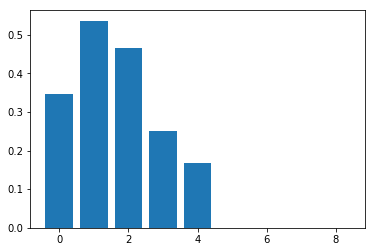

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
show_info(df_train,"SibSp")

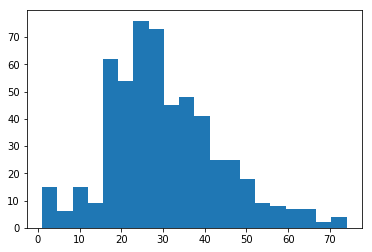

In [20]:
show_hist(df_train_processed,0,"Age")

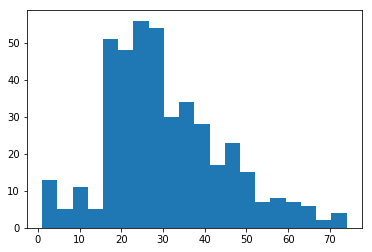

In [22]:
show_hist(df_train,0,"Age")

In [49]:
df_test['Fare'][150:155]

150    83.1583
151     7.8958
152        NaN
153    12.1833
154    31.3875
Name: Fare, dtype: float64